In [2]:
import seaborn as sns
import pandas as pd 



In [3]:
df = pd.read_csv('/Users/runi/Downloads/ny_data.csv', index_col = 0)
df = pd.read_csv('/Users/runi/Downloads/processed_data.csv', index_col = 0)
sns.set_theme(style = "whitegrid", palette = "dark")



Recreate the dual-axis line plot from the previous Exercise using seaborn.
Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.
Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.
Push your project into the remote repo, and attach the notebook containing your analysis and the link for your mentor to review. (Hint: as the data set is quite large (>25Mb), temporarily take it out of the folder for the push, so that only the code and the other files get pushed to the remote repo. After you push the repo, you can get the file back in the working folder. The same goes for the raw data or, generally, for any file larger than 25Mb).

In [10]:
df.columns


Index(['rideable_type', 'started_at', 'ended_at', 'start_station_name',
       'start_station_id', 'end_station_name', 'end_station_id', 'start_lat',
       'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [13]:
df = pd.read_csv('/Users/runi/Downloads/processed_data.csv', index_col = 0)
df['value'] = 1
df_t = df.groupby('start_station_name')['value'].count().reset_index()

In [14]:
top20 = df_t.nlargest(20, 'value')
top20

,start_station_name,value
37,Grove St PATH,42556
75,South Waterfront Walkway - Sinatra Dr & 1 St,34245
44,Hoboken Terminal - River St & Hudson Pl,33020
43,Hoboken Terminal - Hudson St & Hudson Pl,30244
22,City Hall - Washington St & 1 St,23289
69,Newport Pkwy,21961
38,Hamilton Park,20477
68,Newport PATH,19965
42,Hoboken Ave at Monmouth St,19501
61,Marin Light Rail,19230


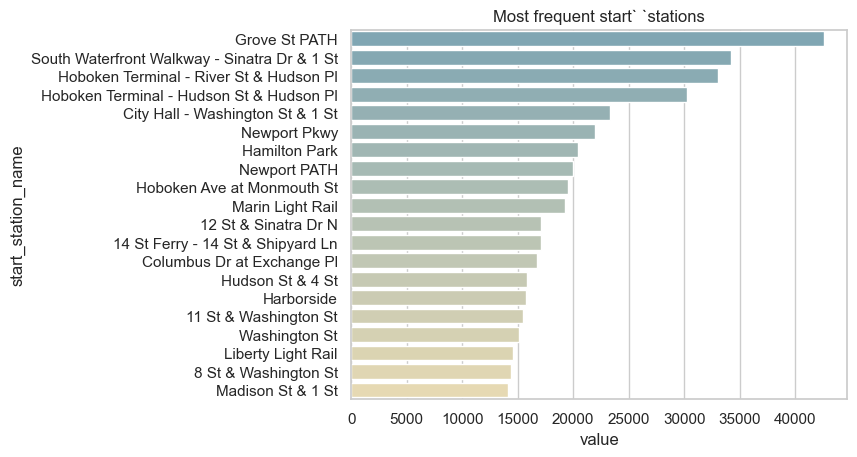

In [32]:

with sns.color_palette("blend:#7AB,#EDA", n_colors = 20):
    sns.barplot(data = top20, x = 'value', y = 'start_station_name').set_title("Most frequent start` `stations")

In [12]:
df = pd.read_csv('/Users/runi/Downloads/ny_data.csv', index_col = 0)
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt
import matplotlib
import seaborn as sns
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
_merge                        object
dtype: object

In [17]:
df_temp = df.set_index('date')

In [18]:
df['date'] = pd.to_datetime(df['date'])

In [19]:
# Set date as index for time series visualization
df.set_index('date', inplace=True)

In [21]:
# Count trips per day
trip_counts = df.groupby('date').size().reset_index(name='trip_count')
# Merge trip count data with temperature data
df_merged = df.merge(trip_counts, on='date', how='left')
df_temp = df_temp.sort_values(by='date')
df_merged = df_merged.sort_values(by='date')

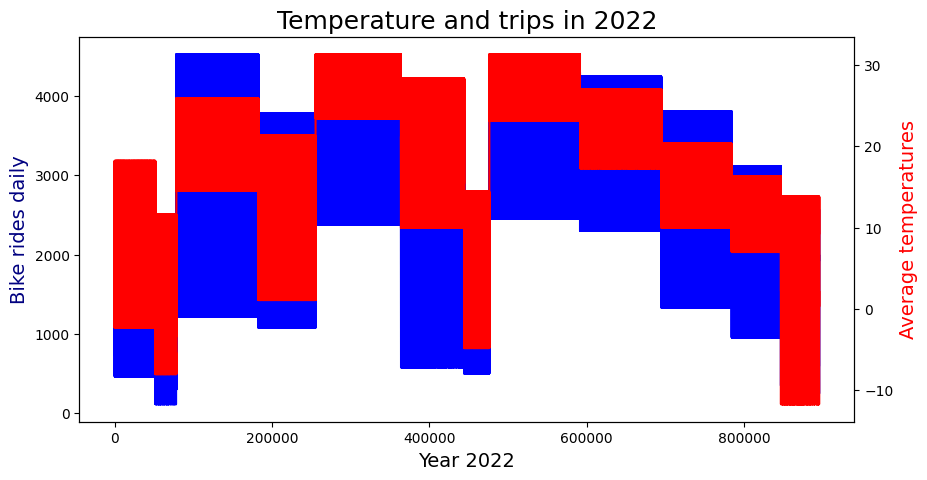

In [22]:
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns

trip_counts = df.groupby('date').size().reset_index(name='trip_count')

df_merged = df_merged.sort_values(by='date')


fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_merged["trip_count"], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "navy", fontsize = 14) # set y-axis label
ax2 = ax.twinx()
sns.lineplot(data = df_merged['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

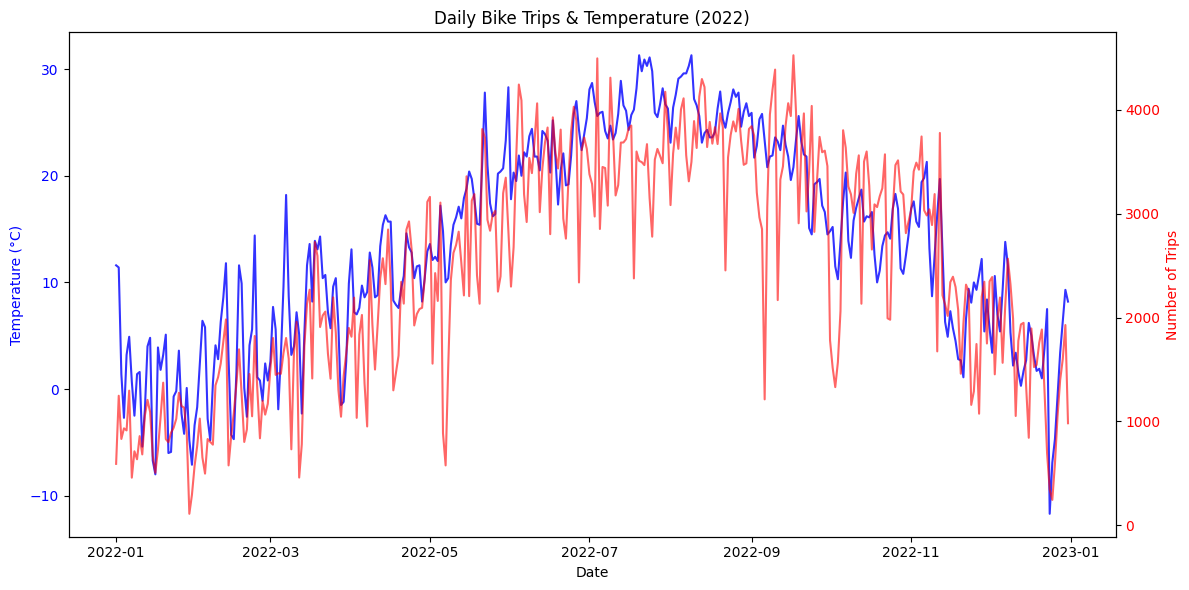

In [23]:
df_temp = df_temp.sort_values(by='date')

fig, ax1 = plt.subplots(figsize=(12, 6))

#df_merged["date"]
#df_merged.index

# First y-axis for temperature
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (°C)", color="blue")
ax1.plot(df_merged["date"], df_merged["avgTemp"], color="blue", label="Temperature", linestyle='-', alpha=0.8)
ax1.tick_params(axis="y", labelcolor="blue")

# Create second y-axis for temperature
#ax2 = ax1.twinx()
##ax2.plot(df_temp['date'], df_temp['avgTemp'], color='blue', label='Average Temperature', marker='o', linestyle='-', alpha=0.6)
#ax2.set_ylabel("Temperature (°C)", color='blue')

# Second y-axis for bike trips
ax2 = ax1.twinx()
ax2.set_ylabel("Number of Trips", color="red")
ax2.plot(df_merged["date"], df_merged["trip_count"], color="red", label="Bike Trips", linestyle='-', alpha=0.6)
ax2.tick_params(axis="y", labelcolor="red")

###########
# Plot bike rides on the primary y-axis (red line)
##ax1.plot(df_temp['date'], df_temp['_merge'], color='red', label='Daily Bike Rides', alpha=0.6)
#ax1.set_xlabel("Date")
#ax1.set_ylabel("Bike Rides", color='red')
###########

# Title and Grid
plt.title("Daily Bike Trips & Temperature (2022)")
fig.tight_layout()
plt.show()




##import matplotlib.pyplot as plt

# Sort data by date to avoid messy lines
#df_temp = df_temp.sort_values(by='date')



# Improve legend and grid
#fig.legend(loc="upper left")
#ax1.grid(True, linestyle="--", alpha=0.5)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)



#
# Count trips per day
#trip_counts = df.groupby('date').size().reset_index(name='trip_count')

# Merge trip count data with temperature data
#df_merged = df.merge(trip_counts, on='date', how='left')

# Preview merged dataframe
#df_merged.head()

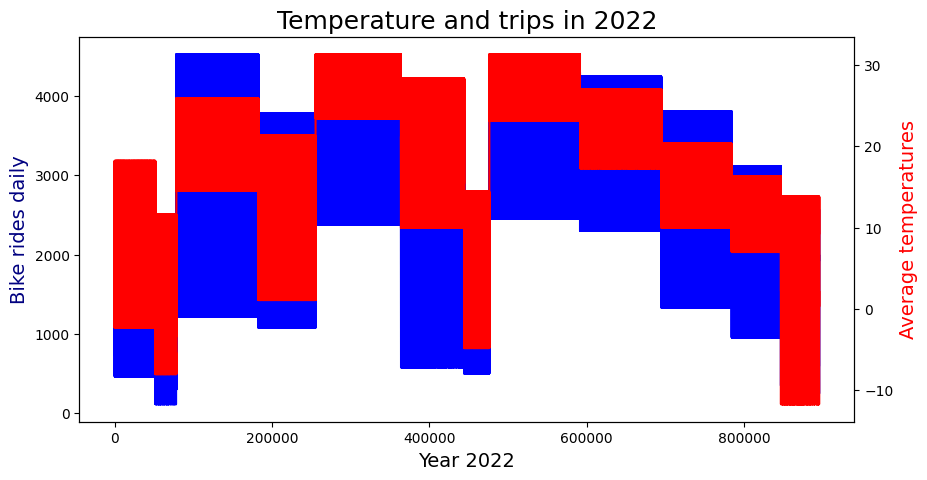

In [27]:


fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data = df_merged["trip_count"], color = "b")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily", color = "navy", fontsize = 14) # set y-axis label
ax2 = ax.twinx()
sns.lineplot(data = df_merged['avgTemp'], color="r", ax=ax2)
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

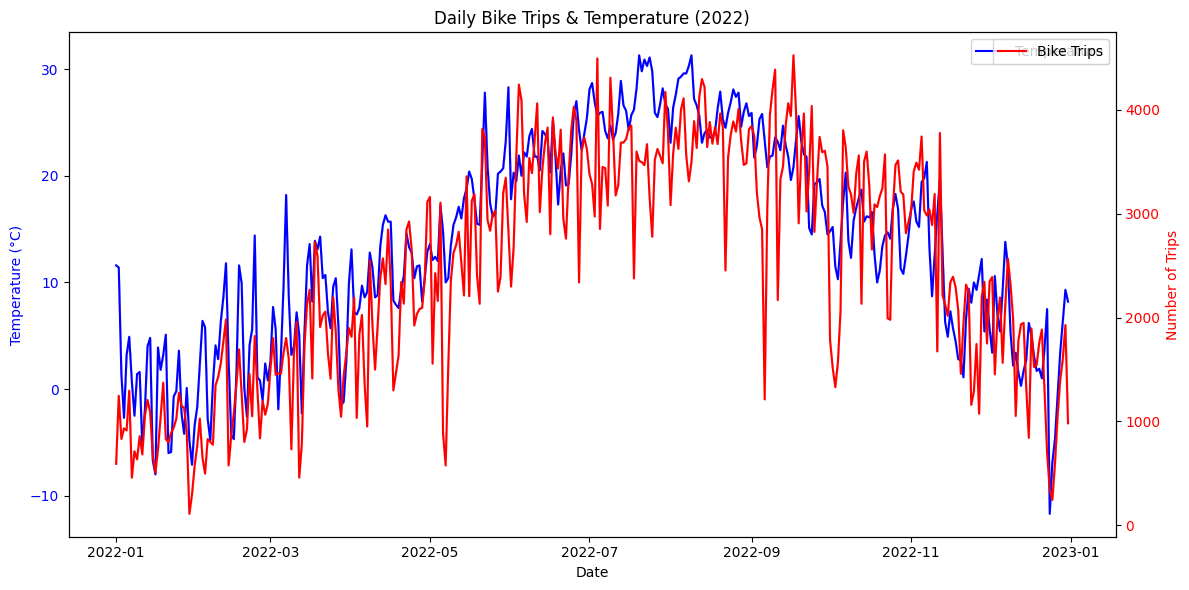

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data by date
df_merged = df_merged.sort_values(by='date')

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Use seaborn to plot temperature on the first y-axis (blue)
sns.lineplot(data=df_merged, x="date", y="avgTemp", ax=ax1, color="blue", label="Temperature")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature (°C)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create second y-axis for bike trips
ax2 = ax1.twinx()
sns.lineplot(data=df_merged, x="date", y="trip_count", ax=ax2, color="red", label="Bike Trips")
ax2.set_ylabel("Number of Trips", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and layout adjustments
plt.title("Daily Bike Trips & Temperature (2022)")
fig.tight_layout()

# Show the plot
plt.show()

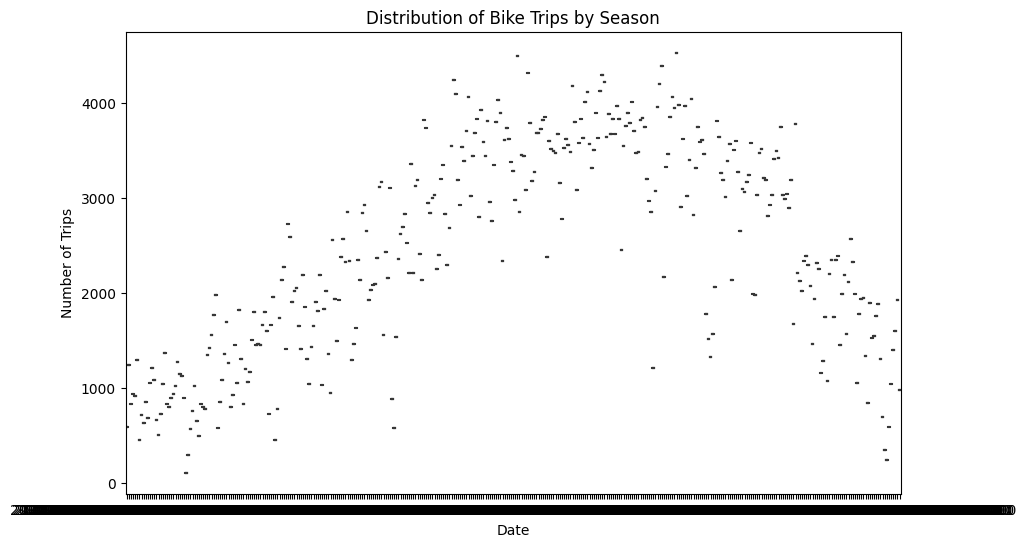

In [32]:


# Box plot of bike trips by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged, x="date", y="trip_count", palette="coolwarm")

# Titles and labels
plt.title("Distribution of Bike Trips by Season")
plt.xlabel("Date")
plt.ylabel("Number of Trips")

plt.show()

In [34]:
categorical_cols = df_merged.select_dtypes(include=['object', 'category']).columns
print("Categorical Variables:", categorical_cols.tolist())

Categorical Variables: ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual', '_merge']


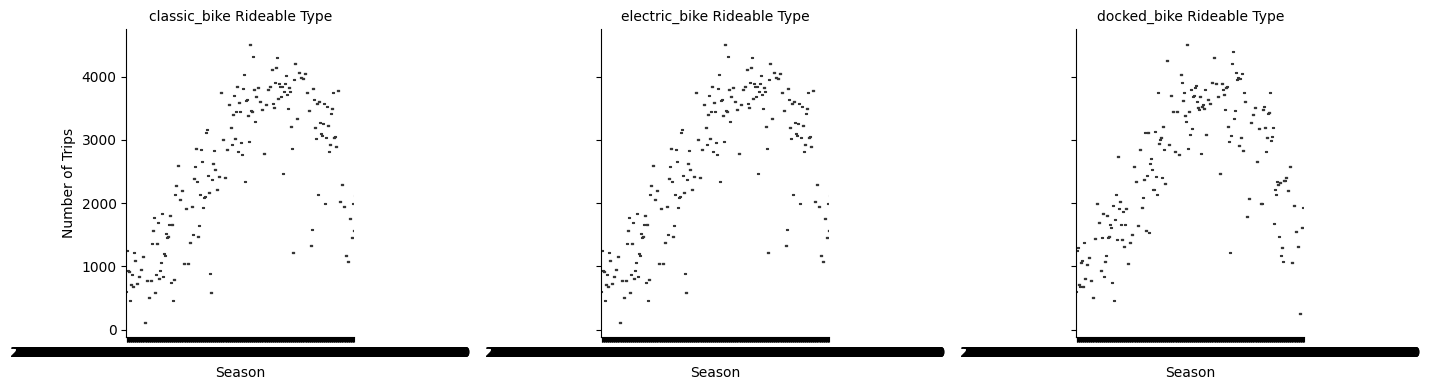

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with rideable_type as the column
g = sns.FacetGrid(df_merged, col="rideable_type", height=4, aspect=1.2)

# Use a box plot instead of scatter plot
g.map_dataframe(sns.boxplot, x="date", y="trip_count", palette="coolwarm")

# Set labels and titles
g.set_axis_labels("Season", "Number of Trips")
g.set_titles(col_template="{col_name} Rideable Type")

plt.show()

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/runi/Downloads/ny_data.csv', index_col = 0)
df = pd.read_csv('/Users/runi/Downloads/processed_data.csv', index_col = 0)


# Use a box plot, mapping categorical (season) to numerical (trip_count)
g.map_dataframe(sns.boxplot, x="avgTemp", y="trip_count", palette="coolwarm")

# Set labels and titles
g.set_axis_labels("Temperature", "Number of Trips")
g.set_titles(col_template="{col_name} Rideable Type")

plt.show()

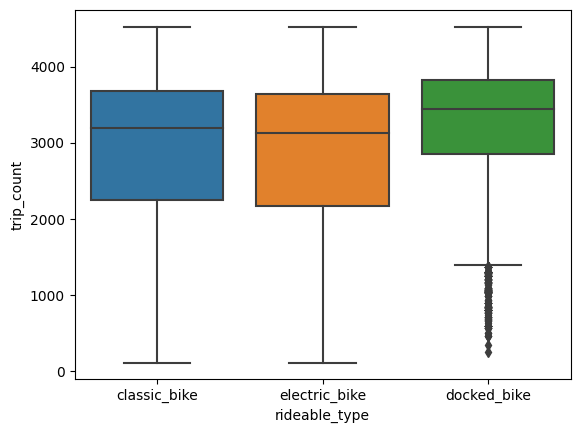

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/runi/Downloads/ny_data.csv', index_col = 0)
df = pd.read_csv('/Users/runi/Downloads/processed_data.csv', index_col = 0)

# Use a box plot, mapping categorical (season) to numerical (trip_count)
#g.map_dataframe(sns.boxplot, x="rideable_type", y="trip_count", palette="coolwarm")

sns.boxplot(x = 'rideable_type', y = 'trip_count', data = df_merged)
#palette = {'Rideable Types': 'royalblue', 'Number of Trips': 'pink'})

# Set labels and titles
#g.set_axis_labels("Rideable Types", "Number of Trips")
#g.set_titles(col_template="{col_name} Rideable Type")


plt.show()

Box Plot Analysis:

The box plot shows how bike trips (trip_count) are distributed across different rideable types. Here's what the box plot tells us:

Median: The middle line inside the box represents the median (or middle value) of trips. It shows us which rideable type has more trips on average. For example, one type may have more trips than another.
Interquartile Range (IQR): The box itself represents the range where most of the data lies. It shows the spread between the first quartile (25% of data) and the third quartile (75% of data). A larger box means the trips are more spread out, while a smaller box means they are more tightly grouped.
Whiskers: The lines extending from the box (called whiskers) show the range of trips. They indicate the lowest and highest values that are still considered "normal." Any data points outside these whiskers are outliers, which means they are extremely high or low trip counts for that rideable type.
Outliers: These are points outside the whiskers and show unusually high or low trip counts. For instance, there might be a day with a very high number of trips (perhaps due to an event or unusual weather), making it an outlier.
Why Do the Figures Look This Way?
Rideable types like electric bikes might show a wider range of trips because people may use them more on certain days (for example, during good weather) but not as much on other days (for instance, in bad weather).
The whiskers and outliers show how some days can have extremely high or low numbers of trips compared to the average day.
In short, the box plot helps us see patterns in bike usage, such as which rideable types are more consistent in their usage and which ones have more fluctuation.

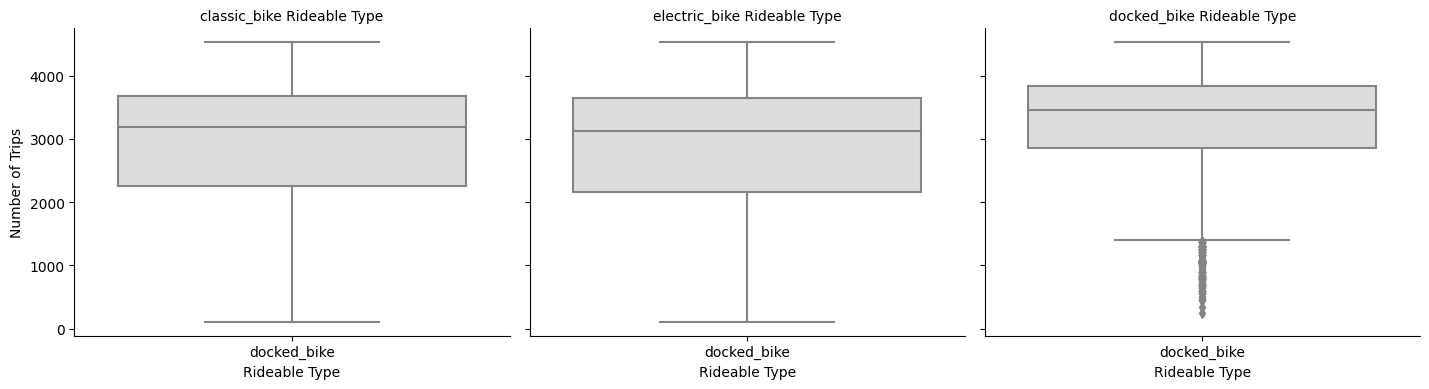

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid to explore trip counts across seasons for each rideable type
g = sns.FacetGrid(df_merged, col="rideable_type", height=4, aspect=1.2)
g.map_dataframe(sns.boxplot, x="rideable_type", y="trip_count", palette="coolwarm")

# Set labels and titles
g.set_axis_labels("Rideable Type", "Number of Trips")
g.set_titles(col_template="{col_name} Rideable Type")

plt.show()

FacetGrid Analysis Insight:

The FacetGrid allows us to see how trip counts differ across each rideable type, with each column representing a different type of rideable (e.g., electric bike, classic bike). By examining each rideable type separately, we can compare the distribution of trips (shown by the box plots) for each type.
The box plot shows the median, interquartile range (IQR), and outliers for each rideable type. From this, we can observe if certain rideable types, like electric bikes, have more consistent trip counts, while others might have a larger spread or more outliers in the data.
This analysis helps us understand which rideable types are used more frequently and if their usage is more consistent or variable. For example, if electric bikes have a higher median and a smaller IQR compared to regular bikes, it might suggest that people rely more on electric bikes, and their usage doesn't fluctuate much.

Key Insight:
The FacetGrid provides a clear breakdown of bike trip patterns across different rideable types. It helps to identify which types are used more regularly and whether their usage fluctuates, offering valuable insights for bike-sharing programs to optimize bike availability or focus on specific types in certain locations or times of the year.